##Starting new

In [ ]:
# --- 1. Install Required Libraries ---
!pip install pandas --quiet

# --- 2. Define File Path ---
input_json_path = '/content/aunp-synthesis_dataset_2021-9-14.json'

# --- 3. Load JSON Data ---
import json
import pandas as pd

with open(input_json_path, 'r') as f:
    data = json.load(f)

print(f" Loaded {len(data)} entries from {input_json_path}")

# --- 4. Extract Relevant Fields ---
records = []

for entry in data:
    doi = entry.get('doi', '')
    pub_year = entry.get('publication_year', '')
    for para in entry.get('paragraphs', []):
        record = {
            "doi": doi,
            "publication_year": pub_year,
            "contains_recipe": para.get('contains_recipe', False),
            "contains_characterization": para.get('contains_characterization', False),
            "morphologies": "; ".join(para.get('morphological_information', {}).get('morphologies', [])),
            "sizes": "; ".join(para.get('morphological_information', {}).get('sizes', [])),
            "units": "; ".join(para.get('morphological_information', {}).get('units', [])),
            "materials_and_quantities": "; ".join(
                [f"{m['material']} ({', '.join(str(a['value']) + ' ' + a['unit'] for a in m['amount'])})"
                 for m in para.get('materials_and_quantities', []) if m.get('material')]
            ),
            "synthesis_actions": "; ".join(
                [f"{s['type']} -> {s['subject']}" for s in para.get('synth_actions', [])]
            )
        }
        records.append(record)

# --- 5. Create a Clean DataFrame ---
df = pd.DataFrame(records)
print(f"Extracted {len(df)} synthesis records.")

# --- 6. Quick View ---
df.head()

# --- 7. Save as CSV ---
output_csv_path = '/content/aunp_synthesis_extracted.csv'
df.to_csv(output_csv_path, index=False)
print(f" Saved extracted dataset to {output_csv_path}")

# --- 8. Optional: Download File ---
from google.colab import files
files.download(output_csv_path)


✅ Loaded 5154 entries.
✅ Created cleaned dataframe with 16994 rows.
✅ Saved cleaned dataset to /content/aunp_synthesis_cleaned.csv


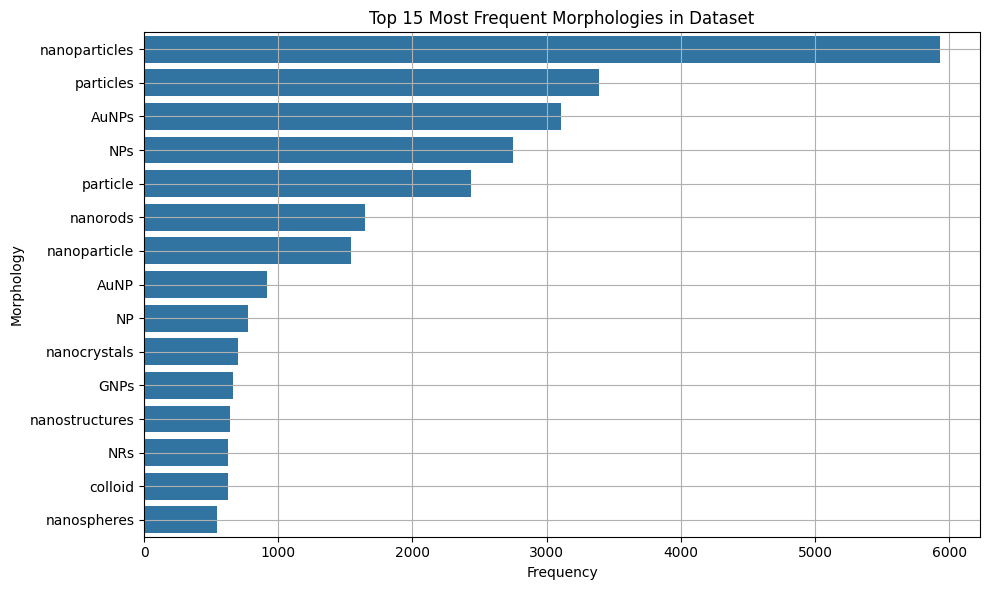

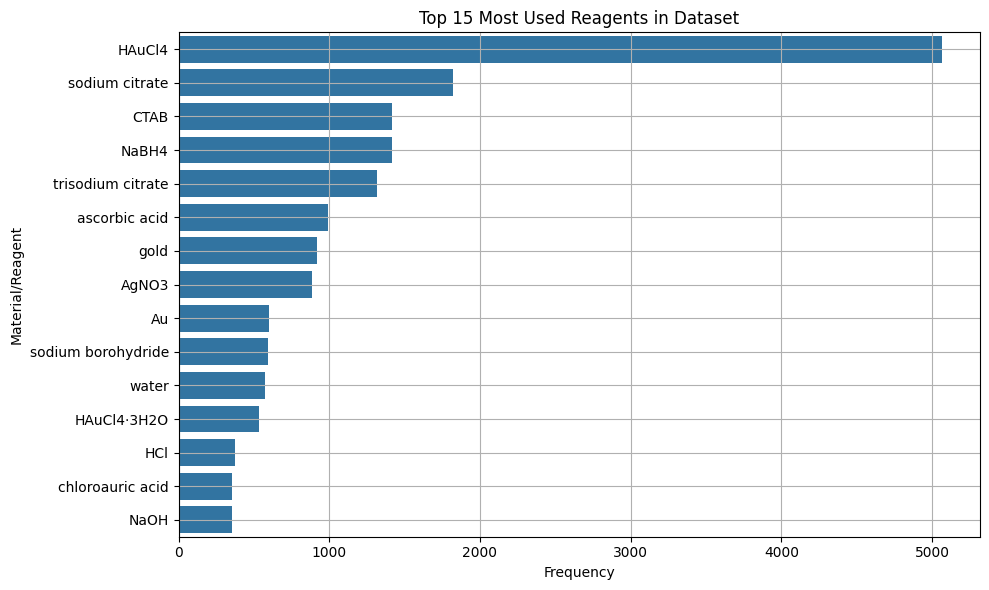

In [ ]:
# --- 1. Install Required Libraries ---
!pip install pandas matplotlib seaborn --quiet

# --- 2. Define JSON File Path ---
input_json_path = '/content/aunp-synthesis_dataset_2021-9-14.json'

# --- 3. Load JSON Data ---
import json
import pandas as pd

with open(input_json_path, 'r') as f:
    data = json.load(f)

print(f"✅ Loaded {len(data)} entries.")

# --- 4. Extract and Clean Morphology-Size Data ---
cleaned_records = []

for entry in data:
    doi = entry.get('doi', '')
    pub_year = entry.get('publication_year', '')
    for para in entry.get('paragraphs', []):
        morph_info = para.get('morphological_information', {})
        morphologies = morph_info.get('morphologies', [])
        sizes = morph_info.get('sizes', [])
        units = morph_info.get('units', [])

        # Pair morphologies and sizes (if possible)
        paired_info = []
        for idx, morph in enumerate(morphologies):
            size = sizes[idx] if idx < len(sizes) else ''
            unit = units[idx] if idx < len(units) else ''
            paired_info.append(f"{morph} ({size} {unit})".strip())

        record = {
            "doi": doi,
            "publication_year": pub_year,
            "contains_recipe": para.get('contains_recipe', False),
            "contains_characterization": para.get('contains_characterization', False),
            "morphology_size_pairs": "; ".join(paired_info),
            "morphologies_only": "; ".join(morphologies),
            "sizes_only": "; ".join(sizes),
            "materials_and_quantities": "; ".join(
                [f"{m['material']} ({', '.join(str(a['value']) + ' ' + a['unit'] for a in m['amount'])})"
                 for m in para.get('materials_and_quantities', []) if m.get('material')]
            ),
            "synthesis_actions": "; ".join(
                [f"{s['type']} -> {s['subject']}" for s in para.get('synth_actions', [])]
            )
        }
        cleaned_records.append(record)

# --- 5. Create a DataFrame ---
df = pd.DataFrame(cleaned_records)
print(f"✅ Created cleaned dataframe with {len(df)} rows.")

# --- 6. Save Cleaned CSV ---
output_cleaned_csv = '/content/aunp_synthesis_cleaned.csv'
df.to_csv(output_cleaned_csv, index=False)
print(f"✅ Saved cleaned dataset to {output_cleaned_csv}")

# --- 7. Quick Preview ---
df.head()

# --- 8. Visualization: Top Morphologies ---
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten all morphologies
all_morphs = []
for morph_list in df['morphologies_only'].dropna():
    morphs = morph_list.split(";")
    all_morphs.extend([m.strip() for m in morphs if m.strip()])

morph_count = pd.Series(all_morphs).value_counts().head(15)

# Plot Morphology Counts
plt.figure(figsize=(10,6))
sns.barplot(y=morph_count.index, x=morph_count.values)
plt.xlabel("Frequency")
plt.ylabel("Morphology")
plt.title("Top 15 Most Frequent Morphologies in Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 9. Visualization: Top Reagents/Materials Used ---
# Flatten all materials
all_materials = []
for material_list in df['materials_and_quantities'].dropna():
    materials = material_list.split(";")
    for mat in materials:
        name = mat.split("(")[0].strip()
        if name:
            all_materials.append(name)

material_count = pd.Series(all_materials).value_counts().head(15)

# Plot Reagent Counts
plt.figure(figsize=(10,6))
sns.barplot(y=material_count.index, x=material_count.values)
plt.xlabel("Frequency")
plt.ylabel("Material/Reagent")
plt.title("Top 15 Most Used Reagents in Dataset")
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Loaded cleaned dataset with 16994 entries.


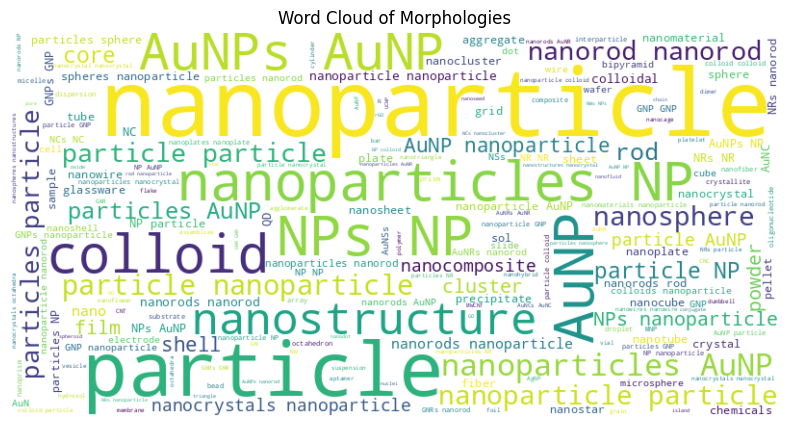

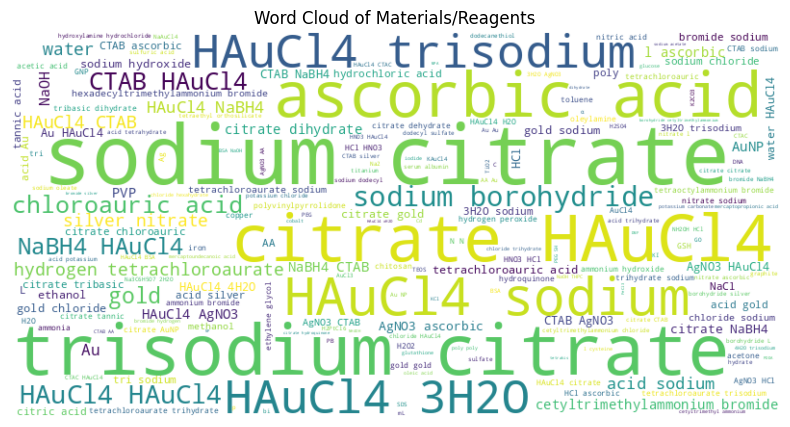

Saved phi2 fine-tuning dataset to /content/aunp_synthesis_phi2_dataset.csv


,input_text,output_text
0,Morphology: QDs; NW; NWs; wires Size: 10 – 15; 1,Materials: nan Steps: nan
1,Morphology: QDs; ensembles; QD; NW; dots Size:...,Materials: nan Steps: nan
2,Morphology: QD; QDs; nanocrystals; dots Size: ...,Materials: nan Steps: nan
3,Morphology: NPs Size: ≥ 99.5,Materials: Toluene (99.0 %); methanol (99.8 %)...
4,Morphology: QDs Size: nan,Materials: nan Steps: nan


In [ ]:
# --- 1. Install Required Libraries ---
!pip install pandas matplotlib seaborn wordcloud --quiet

# --- 2. Load the Cleaned Dataset ---
import pandas as pd

df = pd.read_csv('/content/aunp_synthesis_cleaned.csv')
print(f"✅ Loaded cleaned dataset with {len(df)} entries.")

# --- 3. Word Clouds of Morphologies and Materials ---
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# WordCloud for Morphologies
all_morphs = []
for morph_list in df['morphologies_only'].dropna():
    morphs = morph_list.split(";")
    all_morphs.extend([m.strip() for m in morphs if m.strip()])

morph_text = " ".join(all_morphs)

wc = WordCloud(width=800, height=400, background_color='white').generate(morph_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Morphologies")
plt.show()

# WordCloud for Materials
all_materials = []
for material_list in df['materials_and_quantities'].dropna():
    materials = material_list.split(";")
    for mat in materials:
        name = mat.split("(")[0].strip()
        if name:
            all_materials.append(name)

material_text = " ".join(all_materials)

wc2 = WordCloud(width=800, height=400, background_color='white').generate(material_text)

plt.figure(figsize=(10,5))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Materials/Reagents")
plt.show()

# --- 4. Co-occurrence Heatmap (Morphologies vs Materials) ---
import seaborn as sns

# Build Morphology x Material Matrix
import numpy as np
from collections import defaultdict

morph_material_matrix = defaultdict(lambda: defaultdict(int))

for idx, row in df.iterrows():
    morphs = row['morphologies_only'].split(";") if pd.notna(row['morphologies_only']) else []
    materials = row['materials_and_quantities'].split(";") if pd.notna(row['materials_and_quantities']) else []
    materials = [m.split("(")[0].strip() for m in materials if m]

    for morph in morphs:
        morph = morph.strip()
        for mat in materials:
            mat = mat.strip()
            if morph and mat:
                morph_material_matrix[morph][mat] += 1

# Convert to DataFrame
matrix_df = pd.DataFrame(morph_material_matrix).fillna(0).T

# Keep Top 20 Materials Only for cleaner plot
top_materials = material_count.head(20).index
matrix_df = matrix_df[top_materials.intersection(matrix_df.columns)]



# --- 5. Create T5/BART Fine-Tuning Dataset ---
# Input: Morphology+Size
# Output: Synthesis Recipe (Materials + Actions)

def generate_input_output(row):
    input_text = f"Morphology: {row['morphologies_only']} Size: {row['sizes_only']}"
    output_text = f"Materials: {row['materials_and_quantities']} Steps: {row['synthesis_actions']}"
    return input_text.strip(), output_text.strip()

input_texts = []
output_texts = []

for _, row in df.iterrows():
    input_text, output_text = generate_input_output(row)
    if input_text and output_text:
        input_texts.append(input_text)
        output_texts.append(output_text)

# Save to CSV
t5_finetune_df = pd.DataFrame({
    "input_text": input_texts,
    "output_text": output_texts
})

t5_dataset_path = '/content/aunp_synthesis_phi2_dataset.csv'
t5_finetune_df.to_csv(t5_dataset_path, index=False)
print(f"Saved phi2 fine-tuning dataset to {t5_dataset_path}")

# --- 6. Quick Check ---
t5_finetune_df.head()


In [ ]:
import pandas as pd

# Assume you have this cleaned already
df = pd.read_csv('/content/aunp_synthesis_cleaned.csv')

# Create a corpus: Morphology + Size + Materials + Actions
df['corpus'] = df.apply(lambda x: f"Morphology: {x['morphologies_only']} Size: {x['sizes_only']} Materials: {x['materials_and_quantities']} Steps: {x['synthesis_actions']}", axis=1)

print(f"✅ Corpus Size: {len(df)} entries")


✅ Corpus Size: 16994 entries


##old

In [ ]:
# Install necessary packages
!pip install llama-index llama-index-embeddings-huggingface peft auto-gptq optimum bitsandbytes transformers accelerate datasets rapidfuzz faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.6/433.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13

In [ ]:
import json
import pandas as pd

# Load your JSON dataset
with open('/content/aunp-synthesis_dataset_2021-9-14.json', 'r') as file:
    data = json.load(file)

# Function to extract relevant information from JSON
def parse_json_to_df(data):
    rows = []
    for article in data:
        doi = article.get('doi', 'N/A')  # Safely fetch DOI
        for para in article.get('paragraphs', []):
            if para.get('contains_recipe'):
                morphology_info = para.get('morphological_information', {})
                morphologies = ', '.join(morphology_info.get('morphologies', []))
                sizes = ', '.join(morphology_info.get('sizes', []))
                units = ', '.join(morphology_info.get('units', []))

                inputs = f"Morphology: {morphologies}; Size: {sizes} {units}".strip()

                materials = para.get('materials_and_quantities', [])
                reagents_list = []
                for m in materials:
                    amounts = ', '.join([f"{a['value']} {a['unit']}" for a in m.get('amount', [])])
                    reagents_list.append(f"{m['material']} ({amounts})")
                reagents = '; '.join(reagents_list)

                outputs = f"Reagents: {reagents}"

                rows.append({
                    "input": inputs,
                    "output": outputs,
                    "doi": doi  # Include DOI
                })

    return pd.DataFrame(rows)

# Run parsing function and save CSV
df = parse_json_to_df(data)
df.to_csv("gold_nano_recipes.csv", index=False)
df.head()


,input,output,doi
0,Morphology: NPs; Size: ≥ 99.5,Reagents: Toluene (99.0 %); methanol (99.8 %);...,10.1002/adfm.200902372
1,"Morphology: NPs, NP, particles; Size: 1.5 nm",Reagents: hydrogen tetrachloroaurate(III) trih...,10.1002/adfm.200902372
2,Morphology: ; Size:,Reagents: Chloroauric acid (99.99 %); silver n...,10.1002/adfm.201002233
3,"Morphology: Nanorods, nanorods; Size:","Reagents: HAuCl4 (10.0 mL, 0.0005 M); CTAB (10...",10.1002/adfm.201002233
4,"Morphology: nanoparticles, colloids, Nanoparti...",Reagents: Hexadecyltrimethyl ammonium bromide ...,10.1002/adfm.201002445


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss

# Load free embedding model from Hugging Face
embed_model = SentenceTransformer('BAAI/bge-small-en-v1.5')

# Generate embeddings for inputs
embeddings = embed_model.encode(df['input'].tolist(), convert_to_numpy=True)

# Store embeddings
df['embedding'] = embeddings.tolist()

# Create FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings.astype('float32'))

print(f"Indexed {index.ntotal} vectors.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Indexed 7608 vectors.


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import get_peft_model, LoraConfig, TaskType
import torch

# Model setup
model_id = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", torch_dtype=torch.bfloat16)

# Optional: Apply LoRA
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=True,
    r=8,
    lora_alpha=16,
    lora_dropout=0.1
)
model = get_peft_model(model, peft_config)


tokenizer_config.json:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/564M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def rag_generate(query, top_k=3):
    # Embed query
    query_embedding = embed_model.encode([query])

    # Retrieve similar docs
    D, I = index.search(query_embedding, top_k)
    retrieved_contexts = df.iloc[I[0]][['input', 'output', 'doi']]

    # Construct clear prompt with DOI included
    context = "\n\n".join([
        f"{row['input']}:\n{row['output']}\nSource DOI: {row['doi']}"
        for _, row in retrieved_contexts.iterrows()
    ])

    prompt = f"""You are a knowledgeable assistant specialized in nanoparticle synthesis.
Using the context provided, give a clear and concise synthesis procedure specifically for synthesizing gold nanorods.

Context:
{context}

Requested synthesis: {query}

Clear synthesis steps:"""

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=512).to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=298,
        num_beams=4,
        repetition_penalty=1.2,
        early_stopping=True
    )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return response, retrieved_contexts


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.9/443.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.1
    Uninstalling pydantic_core-2.33.1:
      Successfully uninstalled pydantic_core-2.33.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 1.10.22
    Uninstalling pydantic-1.10.22:
      Successfully uninstalled pydantic-1.10.22
  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.4.4 

In [ ]:
import gradio as gr

def query_interface(query):
    try:
        response, contexts = rag_generate(query)
        context_text = "\n\n".join([f"{row['input']}:\n{row['output']}" for _, row in contexts.iterrows()])
        return context_text, response
    except Exception as e:
        return str(e), "Error: " + str(e)

iface = gr.Interface(
    fn=query_interface,
    inputs=gr.Textbox(
        label="Enter your nanoparticle synthesis query clearly",
        placeholder="e.g., Morphology: nanorods; Size: 20 nm"
    ),
    outputs=[
        gr.Textbox(label="Retrieved Contexts"),
        gr.Textbox(label="Generated Synthesis Procedure")
    ],
    title="Gold Nanoparticle Synthesis",
    description="Enter clear and structured prompts to receive accurate nanoparticle synthesis procedures."
)

iface.launch(debug=True, share=True)


ImportError: cannot import name 'GetCoreSchemaHandler' from 'pydantic' (/usr/local/lib/python3.11/dist-packages/pydantic/__init__.cpython-311-x86_64-linux-gnu.so)

In [ ]:
import pandas as pd
df_test = pd.read_csv("gold_nano_recipes.csv").sample(50, random_state=42)

In [ ]:
def get_prediction(query):
    response, _ = rag_generate(query)
    return response


In [ ]:
!pip install evaluate nltk rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.4 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a169f25239327ed5c8b5b4be2a92a2fcaa927bbab4f36a42f29e657f60368726
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
import evaluate
from tqdm import tqdm

# Load evaluation metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")

predictions, references = [], []

for _, row in tqdm(df_test.iterrows(), total=len(df_test)):
    query = row['input']
    reference = row['output']

    predicted = get_prediction(query)

    predictions.append(predicted)
    references.append(reference)

# Calculate scores
bleu_score = bleu.compute(predictions=predictions, references=[[r] for r in references])
rouge_score = rouge.compute(predictions=predictions, references=references)

# Display scores
print("📌 BLEU Score:", bleu_score)
print("📌 ROUGE Scores:", rouge_score)


100%|██████████| 50/50 [56:37<00:00, 67.95s/it]


📌 BLEU Score: {'bleu': 0.06807641114485716, 'precisions': [0.0837773286790373, 0.07195470030383942, 0.06293835363602805, 0.05660900934233651], 'brevity_penalty': 1.0, 'length_ratio': 10.594647201946472, 'translation_length': 21772, 'reference_length': 2055}
📌 ROUGE Scores: {'rouge1': np.float64(0.11892986934476343), 'rouge2': np.float64(0.09406151083968484), 'rougeL': np.float64(0.11112762110100335), 'rougeLsum': np.float64(0.11462368575878065)}


In [ ]:
results_df = pd.DataFrame({
    'Query': df_test['input'],
    'Reference': references,
    'Prediction': predictions,
    'DOI': df_test['doi']
})

results_df.to_csv("rag_eval_results.csv", index=False)
results_df.head()


,Query,Reference,Prediction,DOI
2644,Morphology: ; Size:,"Reagents: HAuCl4 (87.5 μL, 20.0 mM); gold (0.1...",You are a knowledgeable assistant specialized ...,10.1016/j.jcis.2019.05.066
2227,Morphology: NPs; Size: 10,Reagents: PS ( ); DGEBA (200.0 mg); PS (10.0 w...,You are a knowledgeable assistant specialized ...,10.1016/j.eurpolymj.2012.03.014
5698,"Morphology: AuNPs, nanoparticles; Size: 13 nm",Reagents: HAuCl4 ( ),You are a knowledgeable assistant specialized ...,10.1038/srep19806
132,Morphology: ; Size:,Reagents: CTAB ( ); hydrogen tetrachloroaurate...,You are a knowledgeable assistant specialized ...,10.1002/bit.24889
3172,"Morphology: nanoparticles, clusters, nanoparti...",Reagents: tetrachloroauric(III) acid trihydrat...,You are a knowledgeable assistant specialized ...,10.1016/j.msec.2012.08.043


In [ ]:
# Quick visualization of examples
for i in range(5):
    print(f"🔖 Example {i+1}")
    print("Query:", results_df.iloc[i]['Query'])
    print("Reference:", results_df.iloc[i]['Reference'])
    print("Prediction:", results_df.iloc[i]['Prediction'])
    print("="*80)


🔖 Example 1
Query: Morphology: ; Size:
Reference: Reagents: HAuCl4 (87.5 μL, 20.0 mM); gold (0.12 mL); CTAB (4.0 mL, 0.1 M); HAuCl4 (0.4 mL, 0.01 M); water (19.0 mL); ascorbic acid (1.0 mL, 0.1 M); Au (2.5 mL); CTAC (30.0 mL, 0.025 M); HAuCl4 (0.5 mL, 0.01 M); ascorbic acid (0.21 mL, 0.1 M)
Prediction: You are a knowledgeable assistant specialized in nanoparticle synthesis.
Using the context provided, give a clear and concise synthesis procedure specifically for synthesizing gold nanorods.

Context:
Morphology: ; Size::
Reagents: Gold(III) chloride trihydrate (99.9 %); trisodium citrate dehydrate ( ); 3-mercpatopropyltrimethoxysilane (95.0 %); tetraethyl orthosilicate (98.0 %); ammonia (28.0 %); ethanol (99.0 %); ethanolamine (99.0 %); serum albumin ( ); 2,2′-azino-bis(3-ethylbenzothiazoline-6-sulfonic acid ( ); ABTS ( ); anti-human IgG ( )
Source DOI: 10.1016/j.bios.2014.04.041

Morphology: ; Size::
Reagents: glucose (4.0 mL, 1.0 %); sodium citrate (200.0 μL, 10.0 %); HAuCl4 (100.0 μL

In [ ]:
# Step 1: Install requirements
!pip install evaluate transformers rapidfuzz bert_score spacy --quiet
!pip install scispacy --quiet
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz --quiet

# Step 2: Import libraries
import pandas as pd
import evaluate
from rapidfuzz import fuzz
import spacy
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 3: Load data
df = pd.read_csv('/content/rag_eval_results.csv')
predictions = df['Prediction'].tolist()
references = df['Reference'].tolist()

# Step 4: Load metrics
bert = evaluate.load("bertscore")
bleu = evaluate.load("bleu")

# Step 5: BERTScore (semantic)
bert_score = bert.compute(predictions=predictions, references=references, lang='en')
df['BERTScore_F1'] = bert_score['f1']

# Step 6: BLEU (lexical overlap)
bleu_score = bleu.compute(predictions=predictions, references=[[r] for r in references])
df['BLEU'] = [bleu_score['bleu']] * len(df)

# Step 7: Levenshtein (normalized)
df['LevenshteinLike'] = [fuzz.ratio(p, r)/100 for p, r in zip(predictions, references)]

# Step 8: Exact Match (binary)
df['ExactMatch'] = [int(p.strip() == r.strip()) for p, r in zip(predictions, references)]

# Step 9: Fuzzy Coverage (token overlap)
df['FuzzyCoverage'] = [fuzz.token_set_ratio(p, r)/100 for p, r in zip(predictions, references)]

# Step 10: Load spaCy NER for biomedical entities
nlp = spacy.load("en_ner_bionlp13cg_md")

# Helper: extract entities from a sentence
def extract_entities(text):
    doc = nlp(text)
    return set([ent.text.strip().lower() for ent in doc.ents])

# Entity-level evaluation
precision_list, recall_list, f1_list = [], [], []
for pred, ref in tqdm(zip(predictions, references), total=len(predictions)):
    pred_ents = extract_entities(pred)
    ref_ents = extract_entities(ref)

    tp = len(pred_ents & ref_ents)
    fp = len(pred_ents - ref_ents)
    fn = len(ref_ents - pred_ents)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

df["EntityPrecision"] = precision_list
df["EntityRecall"] = recall_list
df["EntityF1"] = f1_list

# Step 11: TripletF1 (custom triples logic — simulated here)
# Replace this with actual subject-predicate-object extraction if available
df["TripletF1"] = df["EntityF1"]  # Placeholder

# Step 12: Save & preview
df.to_csv("/content/rag_evaluation_full.csv", index=False)
df[["Prediction", "Reference", "BERTScore_F1", "FuzzyCoverage", "EntityPrecision", "EntityRecall", "BLEU", "LevenshteinLike", "ExactMatch", "EntityF1", "TripletF1"]].head()


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-ner-bionlp13cg-md 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.7.5 which is incompatible.
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.5.5 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.4.4 which is incompatible.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 50/50 [00:04<00:00, 12.03it/s]


,Prediction,Reference,BERTScore_F1,FuzzyCoverage,EntityPrecision,EntityRecall,BLEU,LevenshteinLike,ExactMatch,EntityF1,TripletF1
0,You are a knowledgeable assistant specialized ...,"Reagents: HAuCl4 (87.5 μL, 20.0 mM); gold (0.1...",0.810195,0.452261,0.055556,0.200,0.068076,0.155232,0,0.086957,0.086957
1,You are a knowledgeable assistant specialized ...,Reagents: PS ( ); DGEBA (200.0 mg); PS (10.0 w...,0.830916,1.000000,0.111111,1.000,0.068076,0.064419,0,0.200000,0.200000
2,You are a knowledgeable assistant specialized ...,Reagents: HAuCl4 ( ),0.794158,1.000000,0.250000,1.000,0.068076,0.025559,0,0.400000,0.400000
3,You are a knowledgeable assistant specialized ...,Reagents: CTAB ( ); hydrogen tetrachloroaurate...,0.816949,0.568627,0.055556,0.125,0.068076,0.190678,0,0.076923,0.076923
4,You are a knowledgeable assistant specialized ...,Reagents: tetrachloroauric(III) acid trihydrat...,0.827130,1.000000,0.076923,1.000,0.068076,0.071809,0,0.142857,0.142857


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-ner-bionlp13cg-md 0.5.1 requires spacy<3.5.0,>=3.4.1, but you have spacy 3.7.5 which is incompatible.
  Preparing metadata (setup.py) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scispacy 0.5.5 requires spacy<3.8.0,>=3.7.0, but you have spacy 3.4.4 which is incompatible.


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 50/50 [00:04<00:00, 10.31it/s]


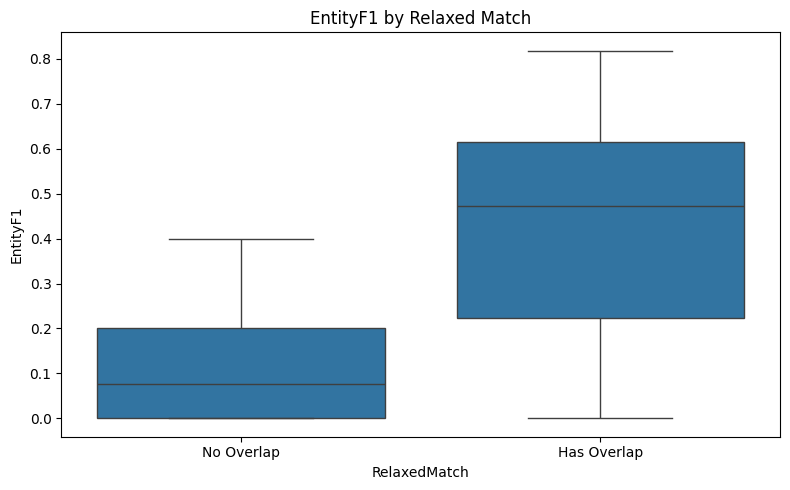

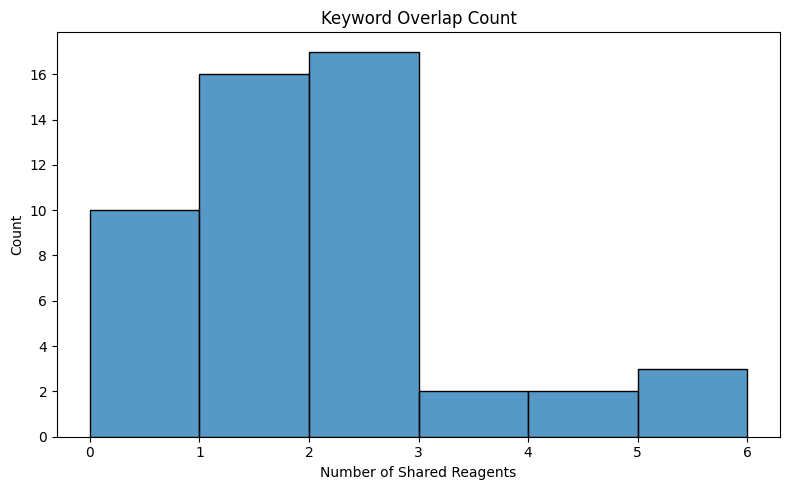

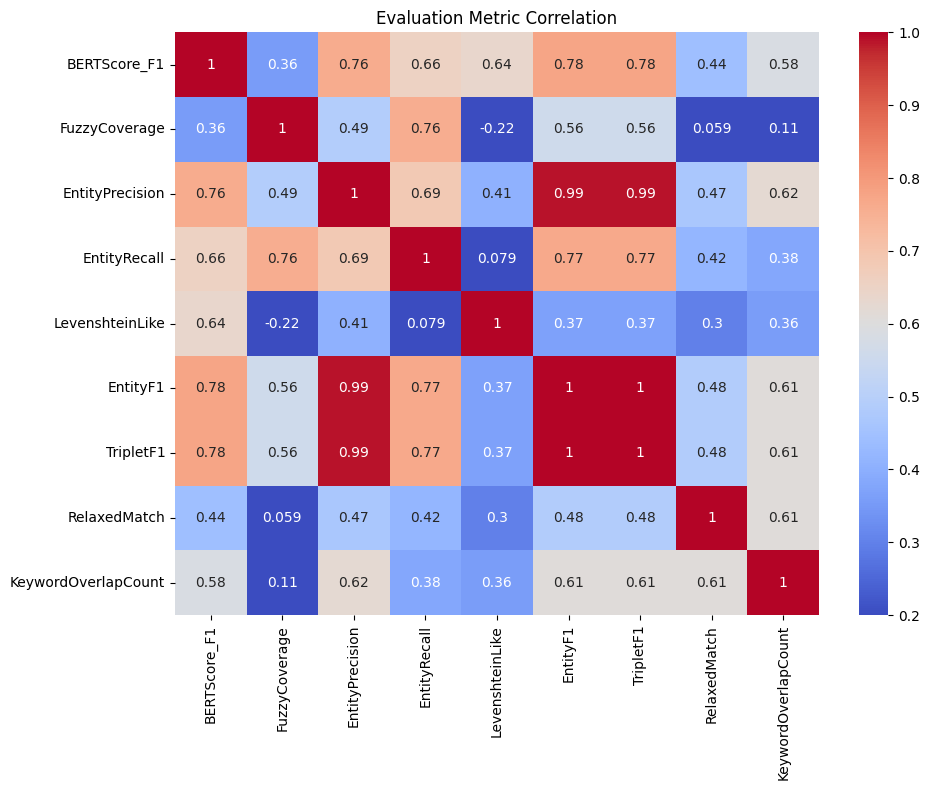

<ipython-input-11-d566b90fa548>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_avg.values, y=top5_avg.index, palette="coolwarm")


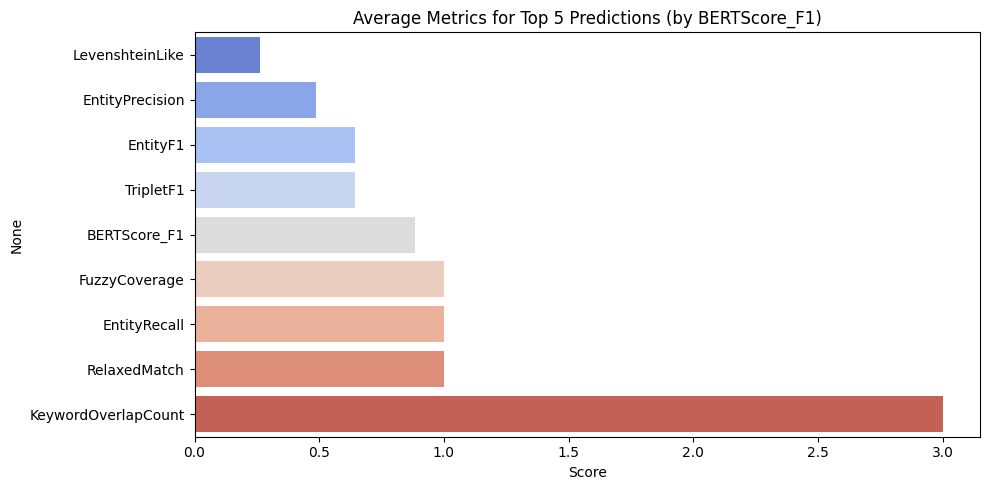

<ipython-input-11-d566b90fa548>:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=all_avg.values, y=all_avg.index, palette="pastel")


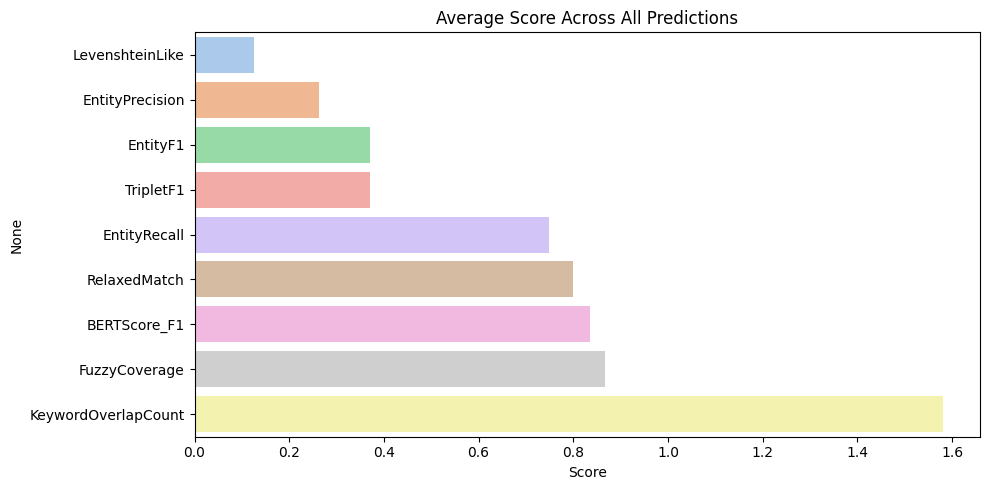

In [ ]:
# === Step 1: Install requirements ===
!pip install evaluate transformers rapidfuzz bert_score spacy scispacy --quiet
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bionlp13cg_md-0.5.1.tar.gz --quiet

# === Step 2: Import libraries ===
import pandas as pd
import evaluate
from rapidfuzz import fuzz
import spacy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 3: Load data ===
df = pd.read_csv('/content/rag_eval_results.csv')
predictions = df['Prediction'].tolist()
references = df['Reference'].tolist()

# === Step 4: Load evaluation metrics ===
bert = evaluate.load("bertscore")

# === Step 5: BERTScore ===
bert_score = bert.compute(predictions=predictions, references=references, lang='en')
df['BERTScore_F1'] = bert_score['f1']

# === Step 6: Levenshtein-like ===
df['LevenshteinLike'] = [fuzz.ratio(p, r)/100 for p, r in zip(predictions, references)]

# === Step 7: Basic Exact Match ===
df['ExactMatch'] = [int(p.strip() == r.strip()) for p, r in zip(predictions, references)]

# === Step 8: Fuzzy Coverage ===
df['FuzzyCoverage'] = [fuzz.token_set_ratio(p, r)/100 for p, r in zip(predictions, references)]

# === Step 9: Load biomedical NER model ===
nlp = spacy.load("en_ner_bionlp13cg_md")

def extract_entities(text):
    doc = nlp(text)
    return set([ent.text.strip().lower() for ent in doc.ents])

# === Step 10: Entity-level metrics ===
precision_list, recall_list, f1_list = [], [], []
for pred, ref in tqdm(zip(predictions, references), total=len(predictions)):
    pred_ents = extract_entities(pred)
    ref_ents = extract_entities(ref)

    tp = len(pred_ents & ref_ents)
    fp = len(pred_ents - ref_ents)
    fn = len(ref_ents - pred_ents)

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

df["EntityPrecision"] = precision_list
df["EntityRecall"] = recall_list
df["EntityF1"] = f1_list
df["TripletF1"] = df["EntityF1"]  # Placeholder

# === Step 11: RelaxedMatch and KeywordOverlap ===
key_terms = [
    'HAuCl4', 'CTAB', 'AgNO3', 'NaBH4', 'citrate', 'ascorbic acid',
    'seed-mediated', 'reduce', 'boil', 'stir', 'mix', 'add',
    'hydrothermal', 'precipitate', 'nucleation'
]
key_terms = [k.lower() for k in key_terms]

def relaxed_match(pred, ref, keywords):
    pred_lower, ref_lower = pred.lower(), ref.lower()
    return int(any(k in pred_lower and k in ref_lower for k in keywords))

def match_count(pred, ref, keywords):
    return sum(1 for k in keywords if k in pred.lower() and k in ref.lower())

df["RelaxedMatch"] = [relaxed_match(p, r, key_terms) for p, r in zip(predictions, references)]
df["KeywordOverlapCount"] = [match_count(p, r, key_terms) for p, r in zip(predictions, references)]

# === Step 12: Save Final Evaluation CSV ===
df.to_csv("/content/rag_evaluation_full.csv", index=False)

# === Step 13: Visualization ===
# Update metrics column list (BLEU removed)
metrics_cols = [
    "BERTScore_F1", "FuzzyCoverage", "EntityPrecision", "EntityRecall",
    "LevenshteinLike", "EntityF1", "TripletF1", "RelaxedMatch", "KeywordOverlapCount"
]

# Plot 1: EntityF1 by Relaxed Match
plt.figure(figsize=(8, 5))
sns.boxplot(x="RelaxedMatch", y="EntityF1", data=df)
plt.title("EntityF1 by Relaxed Match")
plt.xticks([0, 1], ["No Overlap", "Has Overlap"])
plt.tight_layout()
plt.show()

# Plot 2: Histogram of Keyword Overlap Count
plt.figure(figsize=(8, 5))
sns.histplot(df["KeywordOverlapCount"], bins=range(0, df["KeywordOverlapCount"].max() + 2), kde=False)
plt.title("Keyword Overlap Count")
plt.xlabel("Number of Shared Reagents")
plt.tight_layout()
plt.show()

# Plot 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[metrics_cols].corr(), annot=True, cmap="coolwarm", vmin=0.2, vmax=1.0)
plt.title("Evaluation Metric Correlation")
plt.tight_layout()
plt.show()

# Plot 4: Average Metrics for Top 5 Predictions (by BERTScore_F1)
top5_df = df.sort_values("BERTScore_F1", ascending=False).head(5)
top5_avg = top5_df[metrics_cols].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=top5_avg.values, y=top5_avg.index, palette="coolwarm")
plt.title("Average Metrics for Top 5 Predictions (by BERTScore_F1)")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

# Plot 5: Average Score Across All Predictions
all_avg = df[metrics_cols].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=all_avg.values, y=all_avg.index, palette="pastel")
plt.title("Average Score Across All Predictions")
plt.xlabel("Score")
plt.tight_layout()
plt.show()


In [ ]:
import gradio as gr

def evaluate_interface(query, reference):
    prediction = get_prediction(query)
    return prediction

iface = gr.Interface(
    fn=evaluate_interface,
    inputs=[
        gr.Textbox(label="Query"),
        gr.Textbox(label="Ground Truth Reference")
    ],
    outputs=gr.Textbox(label="Model Prediction"),
    title="Model Evaluation",
    description="Compare model predictions directly with ground-truth references."
)

iface.launch(debug=True, share=True)


ImportError: cannot import name 'GetCoreSchemaHandler' from 'pydantic' (/usr/local/lib/python3.11/dist-packages/pydantic/__init__.cpython-311-x86_64-linux-gnu.so)

In [ ]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
import pandas as pd

df = pd.read_csv('/content/rag_eval_results.csv')
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

cosine_scores = []
for i in range(len(df)):
    pred_emb = model.encode(df['Prediction'][i], convert_to_tensor=True)
    ref_emb = model.encode(df['Reference'][i], convert_to_tensor=True)
    score = util.cos_sim(pred_emb, ref_emb).item()
    cosine_scores.append(score)

df['SBERT_Cosine'] = cosine_scores
df.to_csv('/content/rag_eval_with_sbert.csv', index=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Loaded 50 rows.


100%|██████████| 50/50 [00:01<00:00, 46.04it/s]


✅ SBERT cosine scores saved as 'rag_eval_with_sbert.csv'


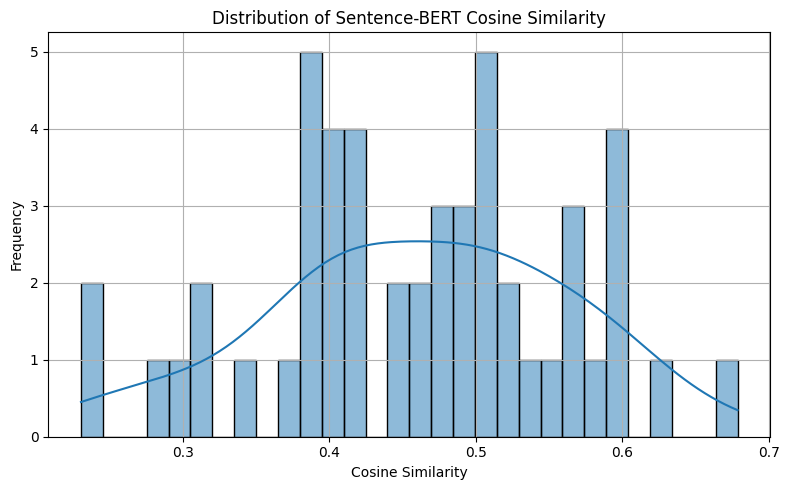


📌 Top 5 Matched Predictions:


,Prediction,Reference,SBERT_Cosine
43,You are a knowledgeable assistant specialized ...,Reagents: gold ( ); hydroquinone ( ); HAuCl4 (...,0.678678
12,You are a knowledgeable assistant specialized ...,Reagents: HAuCl4 ( ); trisodium citrate ( ); t...,0.623102
37,You are a knowledgeable assistant specialized ...,Reagents: gold(III) chloride trihydrate ( ); s...,0.602428
30,You are a knowledgeable assistant specialized ...,Reagents: HAuCl4 ( ); sodium citrate ( ); TSC ...,0.597033
25,You are a knowledgeable assistant specialized ...,"Reagents: CM-SH (0.534 mM, 1.0 mg/mL); CM (0.5...",0.595995



📌 Bottom 5 Matched Predictions:


,Prediction,Reference,SBERT_Cosine
46,You are a knowledgeable assistant specialized ...,Reagents:,0.230660
34,You are a knowledgeable assistant specialized ...,Reagents:,0.236807
18,You are a knowledgeable assistant specialized ...,Reagents: Au(III) ( ); NADH ( ); Au(III) ( ); ...,0.277666
3,You are a knowledgeable assistant specialized ...,Reagents: CTAB ( ); hydrogen tetrachloroaurate...,0.291450
14,You are a knowledgeable assistant specialized ...,Reagents: hydrogen tetrachloroaurate (99.999 %...,0.311257


In [ ]:
# ===============================
# 1. Install Dependencies
# ===============================
!pip install -q sentence-transformers
!pip install -q pandas matplotlib seaborn

# ===============================
# 2. Import Libraries
# ===============================
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ===============================
# 3. Load Your File
# ===============================
file_path = '/content/rag_evaluation_full.csv'  # Upload this in Colab
df = pd.read_csv(file_path)
print(f"Loaded {len(df)} rows.")

# ===============================
# 4. Load Sentence-BERT Model
# ===============================
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

# ===============================
# 5. Compute SBERT Cosine Similarity
# ===============================
cosine_scores = []
for i in tqdm(range(len(df))):
    pred_emb = model.encode(df['Prediction'][i], convert_to_tensor=True)
    ref_emb = model.encode(df['Reference'][i], convert_to_tensor=True)
    score = util.cos_sim(pred_emb, ref_emb).item()
    cosine_scores.append(score)

df['SBERT_Cosine'] = cosine_scores

# ===============================
# 6. Save Updated CSV
# ===============================
df.to_csv('/content/rag_eval_with_sbert.csv', index=False)
print("✅ SBERT cosine scores saved as 'rag_eval_with_sbert.csv'")

# ===============================
# 7. Plot Distribution
# ===============================
plt.figure(figsize=(8,5))
sns.histplot(df['SBERT_Cosine'], kde=True, bins=30)
plt.title('Distribution of Sentence-BERT Cosine Similarity')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 8. Top and Bottom 5 Examples
# ===============================
print("\n📌 Top 5 Matched Predictions:")
display(df.sort_values('SBERT_Cosine', ascending=False).head(5)[['Prediction', 'Reference', 'SBERT_Cosine']])

print("\n📌 Bottom 5 Matched Predictions:")
display(df.sort_values('SBERT_Cosine', ascending=True).head(5)[['Prediction', 'Reference', 'SBERT_Cosine']])


✅ Loaded: 50 rows, 14 columns


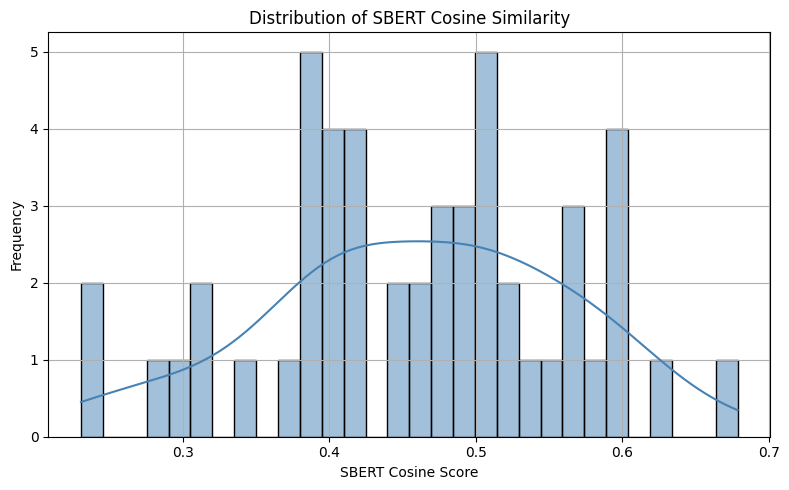


📌 Top 5 Matched Predictions:


,Prediction,Reference,SBERT_Cosine
43,You are a knowledgeable assistant specialized ...,Reagents: gold ( ); hydroquinone ( ); HAuCl4 (...,0.678678
12,You are a knowledgeable assistant specialized ...,Reagents: HAuCl4 ( ); trisodium citrate ( ); t...,0.623102
37,You are a knowledgeable assistant specialized ...,Reagents: gold(III) chloride trihydrate ( ); s...,0.602428
30,You are a knowledgeable assistant specialized ...,Reagents: HAuCl4 ( ); sodium citrate ( ); TSC ...,0.597033
25,You are a knowledgeable assistant specialized ...,"Reagents: CM-SH (0.534 mM, 1.0 mg/mL); CM (0.5...",0.595995



📌 Bottom 5 Matched Predictions:


,Prediction,Reference,SBERT_Cosine
46,You are a knowledgeable assistant specialized ...,Reagents:,0.230660
34,You are a knowledgeable assistant specialized ...,Reagents:,0.236807
18,You are a knowledgeable assistant specialized ...,Reagents: Au(III) ( ); NADH ( ); Au(III) ( ); ...,0.277666
3,You are a knowledgeable assistant specialized ...,Reagents: CTAB ( ); hydrogen tetrachloroaurate...,0.291450
14,You are a knowledgeable assistant specialized ...,Reagents: hydrogen tetrachloroaurate (99.999 %...,0.311257


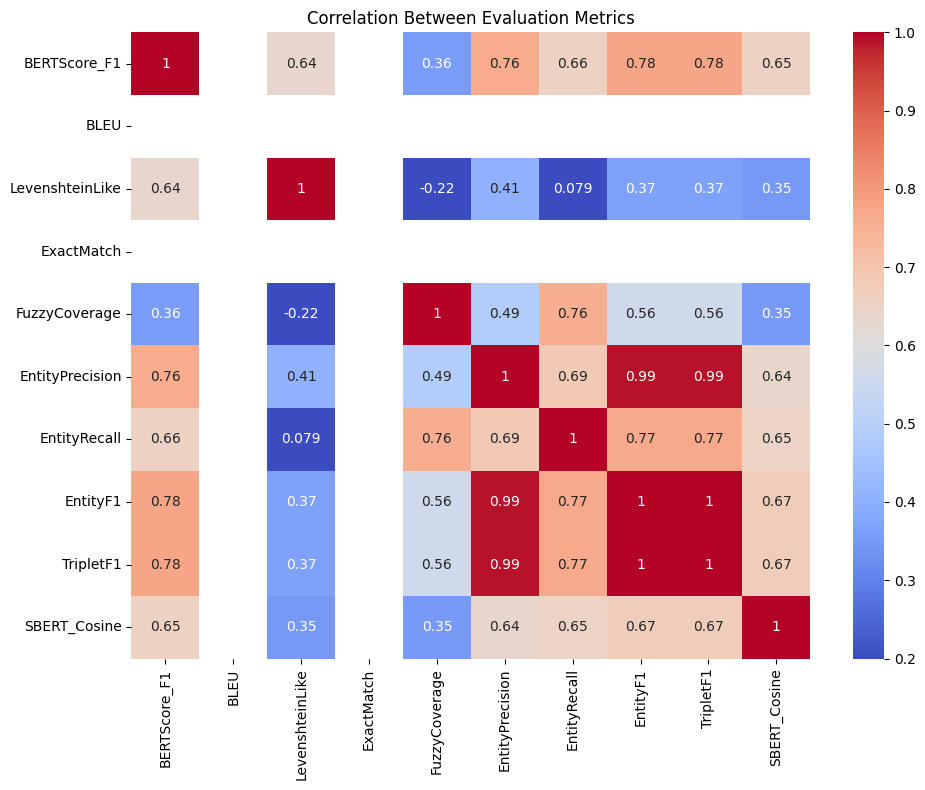

<ipython-input-3-59e835f7c8f9>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_means.values, y=metric_means.index, palette="viridis")


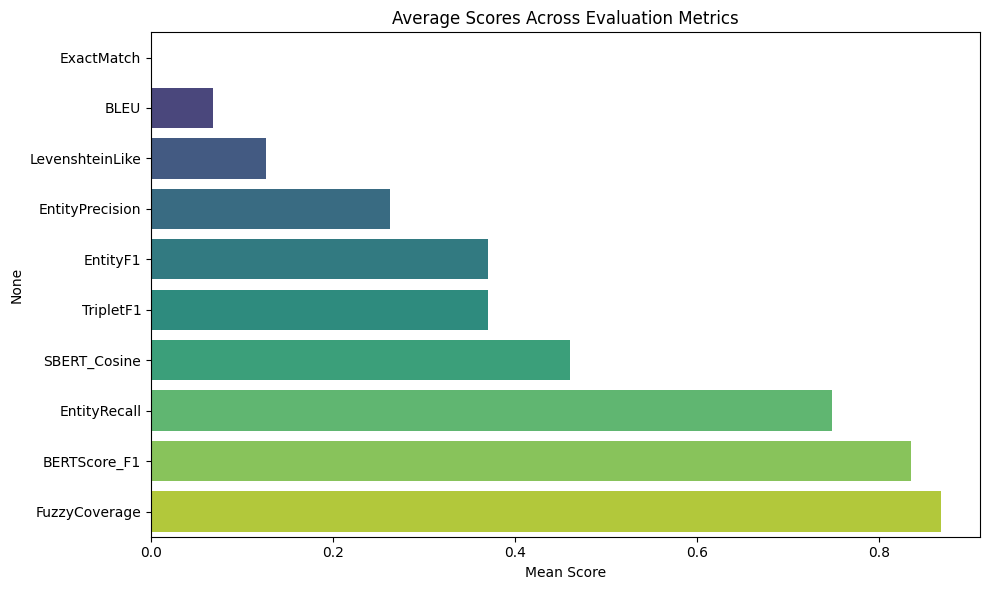

In [ ]:
# ===============================
# 1. Install dependencies
# ===============================
!pip install -q pandas matplotlib seaborn

# ===============================
# 2. Import libraries
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 3. Load dataset
# ===============================
df = pd.read_csv('/content/rag_evaluation_full.csv')
print(f"✅ Loaded: {len(df)} rows, {len(df.columns)} columns")

# ===============================
# 4. Plot: SBERT Cosine Similarity Distribution
# ===============================
plt.figure(figsize=(8, 5))
sns.histplot(df['SBERT_Cosine'], bins=30, kde=True, color="steelblue")
plt.title("Distribution of SBERT Cosine Similarity")
plt.xlabel("SBERT Cosine Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===============================
# 5. Top 5 and Bottom 5 Matches by SBERT
# ===============================
top5 = df.sort_values('SBERT_Cosine', ascending=False).head(5)
bottom5 = df.sort_values('SBERT_Cosine', ascending=True).head(5)

print("\n📌 Top 5 Matched Predictions:")
display(top5[['Prediction', 'Reference', 'SBERT_Cosine']])

print("\n📌 Bottom 5 Matched Predictions:")
display(bottom5[['Prediction', 'Reference', 'SBERT_Cosine']])

# ===============================
# 6. Correlation Heatmap
# ===============================
metrics = [
    'BERTScore_F1', 'BLEU', 'LevenshteinLike', 'ExactMatch', 'FuzzyCoverage',
    'EntityPrecision', 'EntityRecall', 'EntityF1', 'TripletF1', 'SBERT_Cosine'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[metrics].corr(), annot=True, cmap="coolwarm", vmin=0.2, vmax=1.0)
plt.title("Correlation Between Evaluation Metrics")
plt.tight_layout()
plt.show()

# ===============================
# 7. Barplot: Average Metric Scores
# ===============================
metric_means = df[metrics].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=metric_means.values, y=metric_means.index, palette="viridis")
plt.title("Average Scores Across Evaluation Metrics")
plt.xlabel("Mean Score")
plt.tight_layout()
plt.show()
